#### 2.3.1. Загрузка данных и первичный осмотр

1. Импортировать необходимые библиотеки:
   - `pandas` (обязательно),
   - при необходимости `numpy`,
   - `matplotlib.pyplot` для визуализации.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

2. Загрузить учебный датасет в `pandas.DataFrame` с помощью `pd.read_csv` (или другого подходящего метода).

In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "ealaxi/paysim1",
)

ModuleNotFoundError: No module named 'kagglehub'

3. Вывести:
   - первые строки датасета (`head()`),
   - информацию о столбцах и типах (`info()`),
   - базовые описательные статистики (`describe()` или аналог).

In [4]:
df.head() # Первые пять строчек таблицы

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.info() # Информация о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.describe() # Базовые описательные статистики таблицы

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


#### 2.3.2. Пропуски, дубликаты и базовый контроль качества

1. Посчитать долю пропусков в каждом столбце (например, через `isna().mean()` или аналог).

In [7]:
df.isna().mean() # Считаем количество пустых ячеек в каждом из столбцов 

step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64

2. Проверить наличие полностью дублирующих строк (через `duplicated()`).

In [8]:
df[df.duplicated()] # Проверка на то, есть ли у нас дубликаты среди строк, False - их нет, True - дубликат. Я вывел только дубликаты специально. Можно использовать df.duplicated() и получить полную информацию

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


3. Найти и вывести «подозрительные» случаи, исходя из смысла датасета. Примеры:
   - отрицательные значения в полях, где их не должно быть (количество, цена и т.п.);
   - нереалистичные значения (например, возраст > 100, нулевой доход при ненулевых количествах и т.п.);
   - другие логические противоречия, характерные для конкретного датасета.

In [9]:
df['type'].unique() # Проверка на типы, есть ли какие-либо неверные. Вообще я думаю это нужно првоерять через существующий enum, который мы изначально сами заводим (для автопроверок), но сейчас глазами на верность проверка

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [10]:
df[df['step'] <= 0] # Вывод строк где шаг меньше 0, что не логично

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [11]:
df[df['amount'] <= 0] # Проверка на то, что сумма транзакции 0 или меньше, они все помечены тем что это мошенечество

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0


In [12]:
df[(df['type'] == "TRANSFER") & (df['oldbalanceOrg'] - df['newbalanceOrig'] != df['amount'])]
# Можно заметить проблемы, когда мы спиываем больше, чем у нас есть на счете и не помечены как fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
19,1,TRANSFER,215310.30,C1670993182,705.00,0.00,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.00,C932583850,6267.00,2719172.89,0,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.00,C1330106945,57901.66,24044.18,0,0
79,1,TRANSFER,77957.68,C207471778,0.00,0.00,C1761291320,94900.00,22233.65,0,0
80,1,TRANSFER,17231.46,C1243171897,0.00,0.00,C783286238,24672.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362322,718,TRANSFER,82096.45,C614459560,13492.00,0.00,C855350324,0.00,82096.45,0,0
6362456,730,TRANSFER,10000000.00,C1277761503,37316255.05,27316255.05,C500987951,0.00,0.00,1,0
6362460,730,TRANSFER,10000000.00,C2140038573,17316255.05,17316255.05,C1395467927,0.00,0.00,1,1
6362462,730,TRANSFER,7316255.05,C1869569059,17316255.05,17316255.05,C1861208726,0.00,0.00,1,1


In [13]:
df[(df['type'] == "PAYMENT") & (df['oldbalanceOrg'] - df['amount'] != df['newbalanceOrig'])]
# Видим есть проблемы, такие как списание больших денег, чем есть на балансе, а такого быть не должно

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.0,0,0
13,1,PAYMENT,11633.76,C1716932897,10127.00,0.00,M801569151,0.0,0.0,0,0
16,1,PAYMENT,1563.82,C761750706,450.00,0.00,M1731217984,0.0,0.0,0,0
25,1,PAYMENT,6061.13,C1043358826,443.00,0.00,M1558079303,0.0,0.0,0,0
28,1,PAYMENT,8901.99,C1632497828,2958.91,0.00,M33419717,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362310,718,PAYMENT,6416.50,C1532874529,360.00,0.00,M265333537,0.0,0.0,0,0
6362311,718,PAYMENT,4276.61,C590780626,155.00,0.00,M2101529217,0.0,0.0,0,0
6362314,718,PAYMENT,17841.23,C1045048098,10182.00,0.00,M1878955882,0.0,0.0,0,0
6362316,718,PAYMENT,1022.91,C1203084509,12.00,0.00,M675916850,0.0,0.0,0,0


4. Кратко (1-2 абзаца) описать текстом, какие проблемы качества данных были обнаружены.

В таблице представлены данные с определенными лоигческими ошибками, к примеру как при списании у нас списываются деньги, хотя не хватает. Или как мы прееводим больше чем у нас есть. А также данные операции зачастую не помечены как isFraude.

#### 2.3.3. Базовый EDA: группировки, агрегаты и частоты

1. Посчитать частоты для одной или двух категориальных переменных (например, `value_counts()` для столбца с категорией/страной/классом).

In [14]:
df['type'].value_counts() # Посчитал частоту одной категориальной переменной (в таблице больше таких нет)

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

2. Выполнить хотя бы одну осмысленную группировку с агрегатами через `groupby`:
   - например, среднее и сумму по количественным признакам в разрезе категорий.

In [15]:
df.groupby("type").agg(
    avg_amount=("amount", "mean"),
    max_amount=("amount", "max"),
    min_amount=("amount", "min")
) # Использование оператора объединения для получения средней суммы по типам операции, максимальной и минимальной (она осмысленная в рамках статистики)

,avg_amount,max_amount,min_amount
type,,,
CASH_IN,168920.242004,1915267.90,0.04
CASH_OUT,176273.964346,10000000.00,0.00
DEBIT,5483.665314,569077.51,0.55
PAYMENT,13057.604660,238637.98,0.02
TRANSFER,910647.009645,92445516.64,2.60


3. При необходимости ввести дополнительные «коридоры» (bins) или группировки (например, возрастные группы, диапазоны значений и т.п.).

In [16]:
bins = [0, 100, 1000, 10000, df['amount'].max()]
labels = ["0 - 100", "100-1000", "1000-10000", "10000+"]

df['amount_group']= pd.cut(df['amount'], bins=bins, labels=labels, include_lowest=True)
df['amount_group'].value_counts()
# Добавил разделение на то, с какими деньгами произошли операции, сделал это больше как для практики, чем для смысла

amount_group
10000+        5076529
1000-10000    1143445
100-1000       128541
0 - 100         14105
Name: count, dtype: int64

4. Кратко (1-2 абзаца) описать текстом основные наблюдения:
   - какие категории доминируют,
   - как отличаются группы по средним значениям,
   - есть ли неожиданные эффекты.

Доминирует категория cashout (вывода средств).
По средним значениям у Debit меньше всего, cashout и cashin имеют равный счет. Оплачивают в среднем тоже на маленькую сумму, а переводы самая большая часть денежных операций.
Самый неожиданный эффект это то, что у меня есть вывод 0 монеток, об этом писалось выше, а также что в основном преобладают операции больше 10000 (датасет вроде на доллары расчитан, и словно иметь такие огромные переводы относительно подорзительно (хотя возможно мир богатых))

### 2.4. Визуализация данных в Matplotlib


1. **Одну гистограмму** для количественного признака:
   - осмысленный выбор числа корзин (`bins`),
   - подписи осей и заголовок.

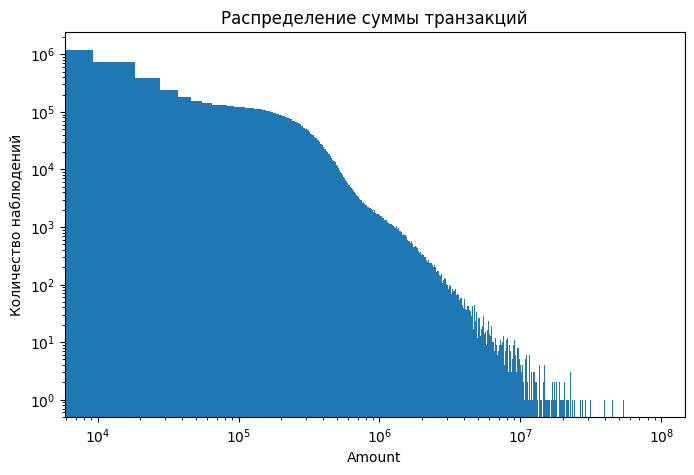

In [32]:
plt.figure(figsize=(8,5))

plt.hist(df["amount"], bins=10000)
plt.yscale("log") # лог добавил чтобы мы хоть какую-то разницу видели
plt.xscale("log")

plt.title("Распределение суммы транзакций")
plt.xlabel("Amount")
plt.ylabel("Количество наблюдений")

plt.show() 


2. **Один боксплот (boxplot)** для количественного признака:
   - можно как общий, так и по группам (например, по категориям),
   - подписи оси и заголовок.

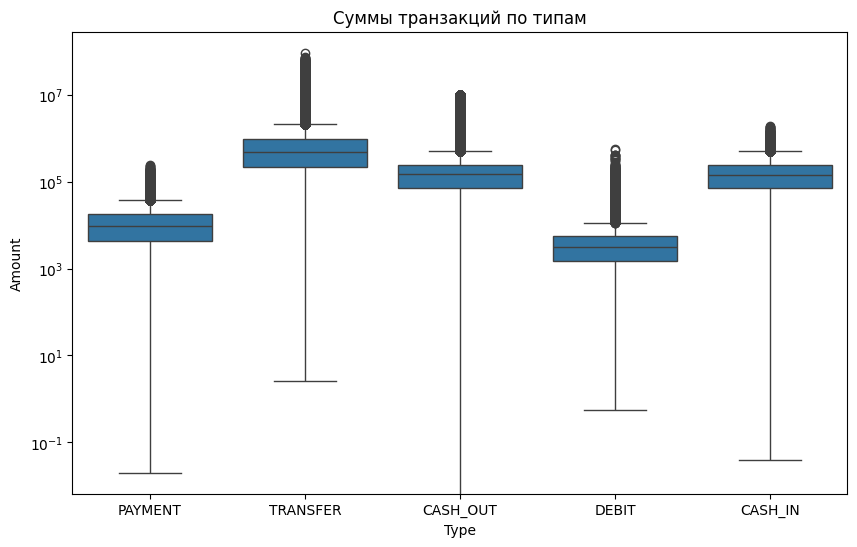

In [33]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='amount', data=df) # Почему seaborn поставил, в иных случах к прмиеру с amount у меня ужассно распределение выглядит, а тут более менее видно
plt.title("Суммы транзакций по типам")
plt.ylabel("Amount")
plt.yscale("log")
plt.xlabel("Type")
plt.show()



3. **Один scatter plot** (диаграмма рассеяния) для пары количественных признаков:
   - подписи обеих осей,
   - заголовок,
   - при желании можно добавить цвет/легенду для различения категорий.

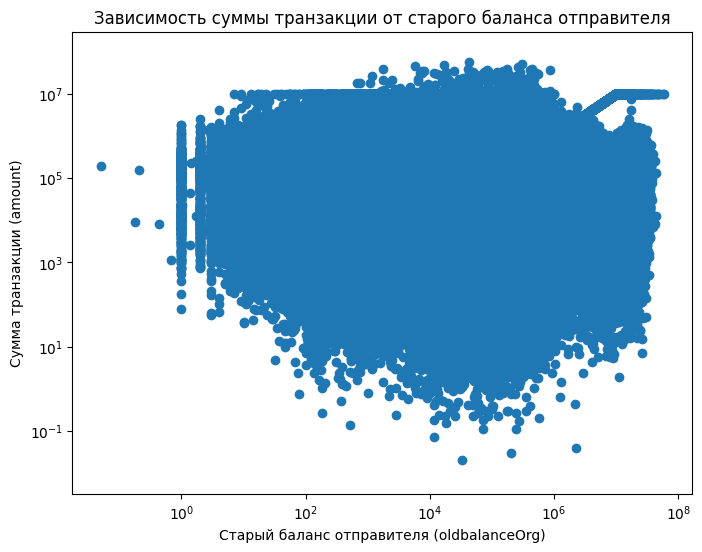

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(df['oldbalanceOrg'], df['amount'])
plt.title("Зависимость суммы транзакции от старого баланса отправителя")
plt.xlabel("Старый баланс отправителя (oldbalanceOrg)")
plt.ylabel("Сумма транзакции (amount)")
plt.yscale('log')
plt.xscale('log')
plt.show()